In [37]:
import glob
import cv2
from skimage.feature import hog
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle

In [38]:
car_imgs = glob.glob('../vehicles/**/*.png')
noncar_imgs = glob.glob('../non-vehicles/**/*.png')
print('number of cars images = {}'.format(len(car_imgs)))
print('number of not cars images = {}'.format(len(noncar_imgs)))

number of cars images = 8792
number of not cars images = 8968


In [39]:
#apply hog transform
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

D:\Programmmi\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:144: RuntimeWarning: invalid value encountered in sqrt
  image = np.sqrt(image)
D:\Programmmi\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:190: RuntimeWarning: invalid value encountered in remainder
  orientations, orientation_histogram)
D:\Programmmi\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:17: RuntimeWarning: invalid value encountered in minimum
  out = np.minimum(out, 0.2)


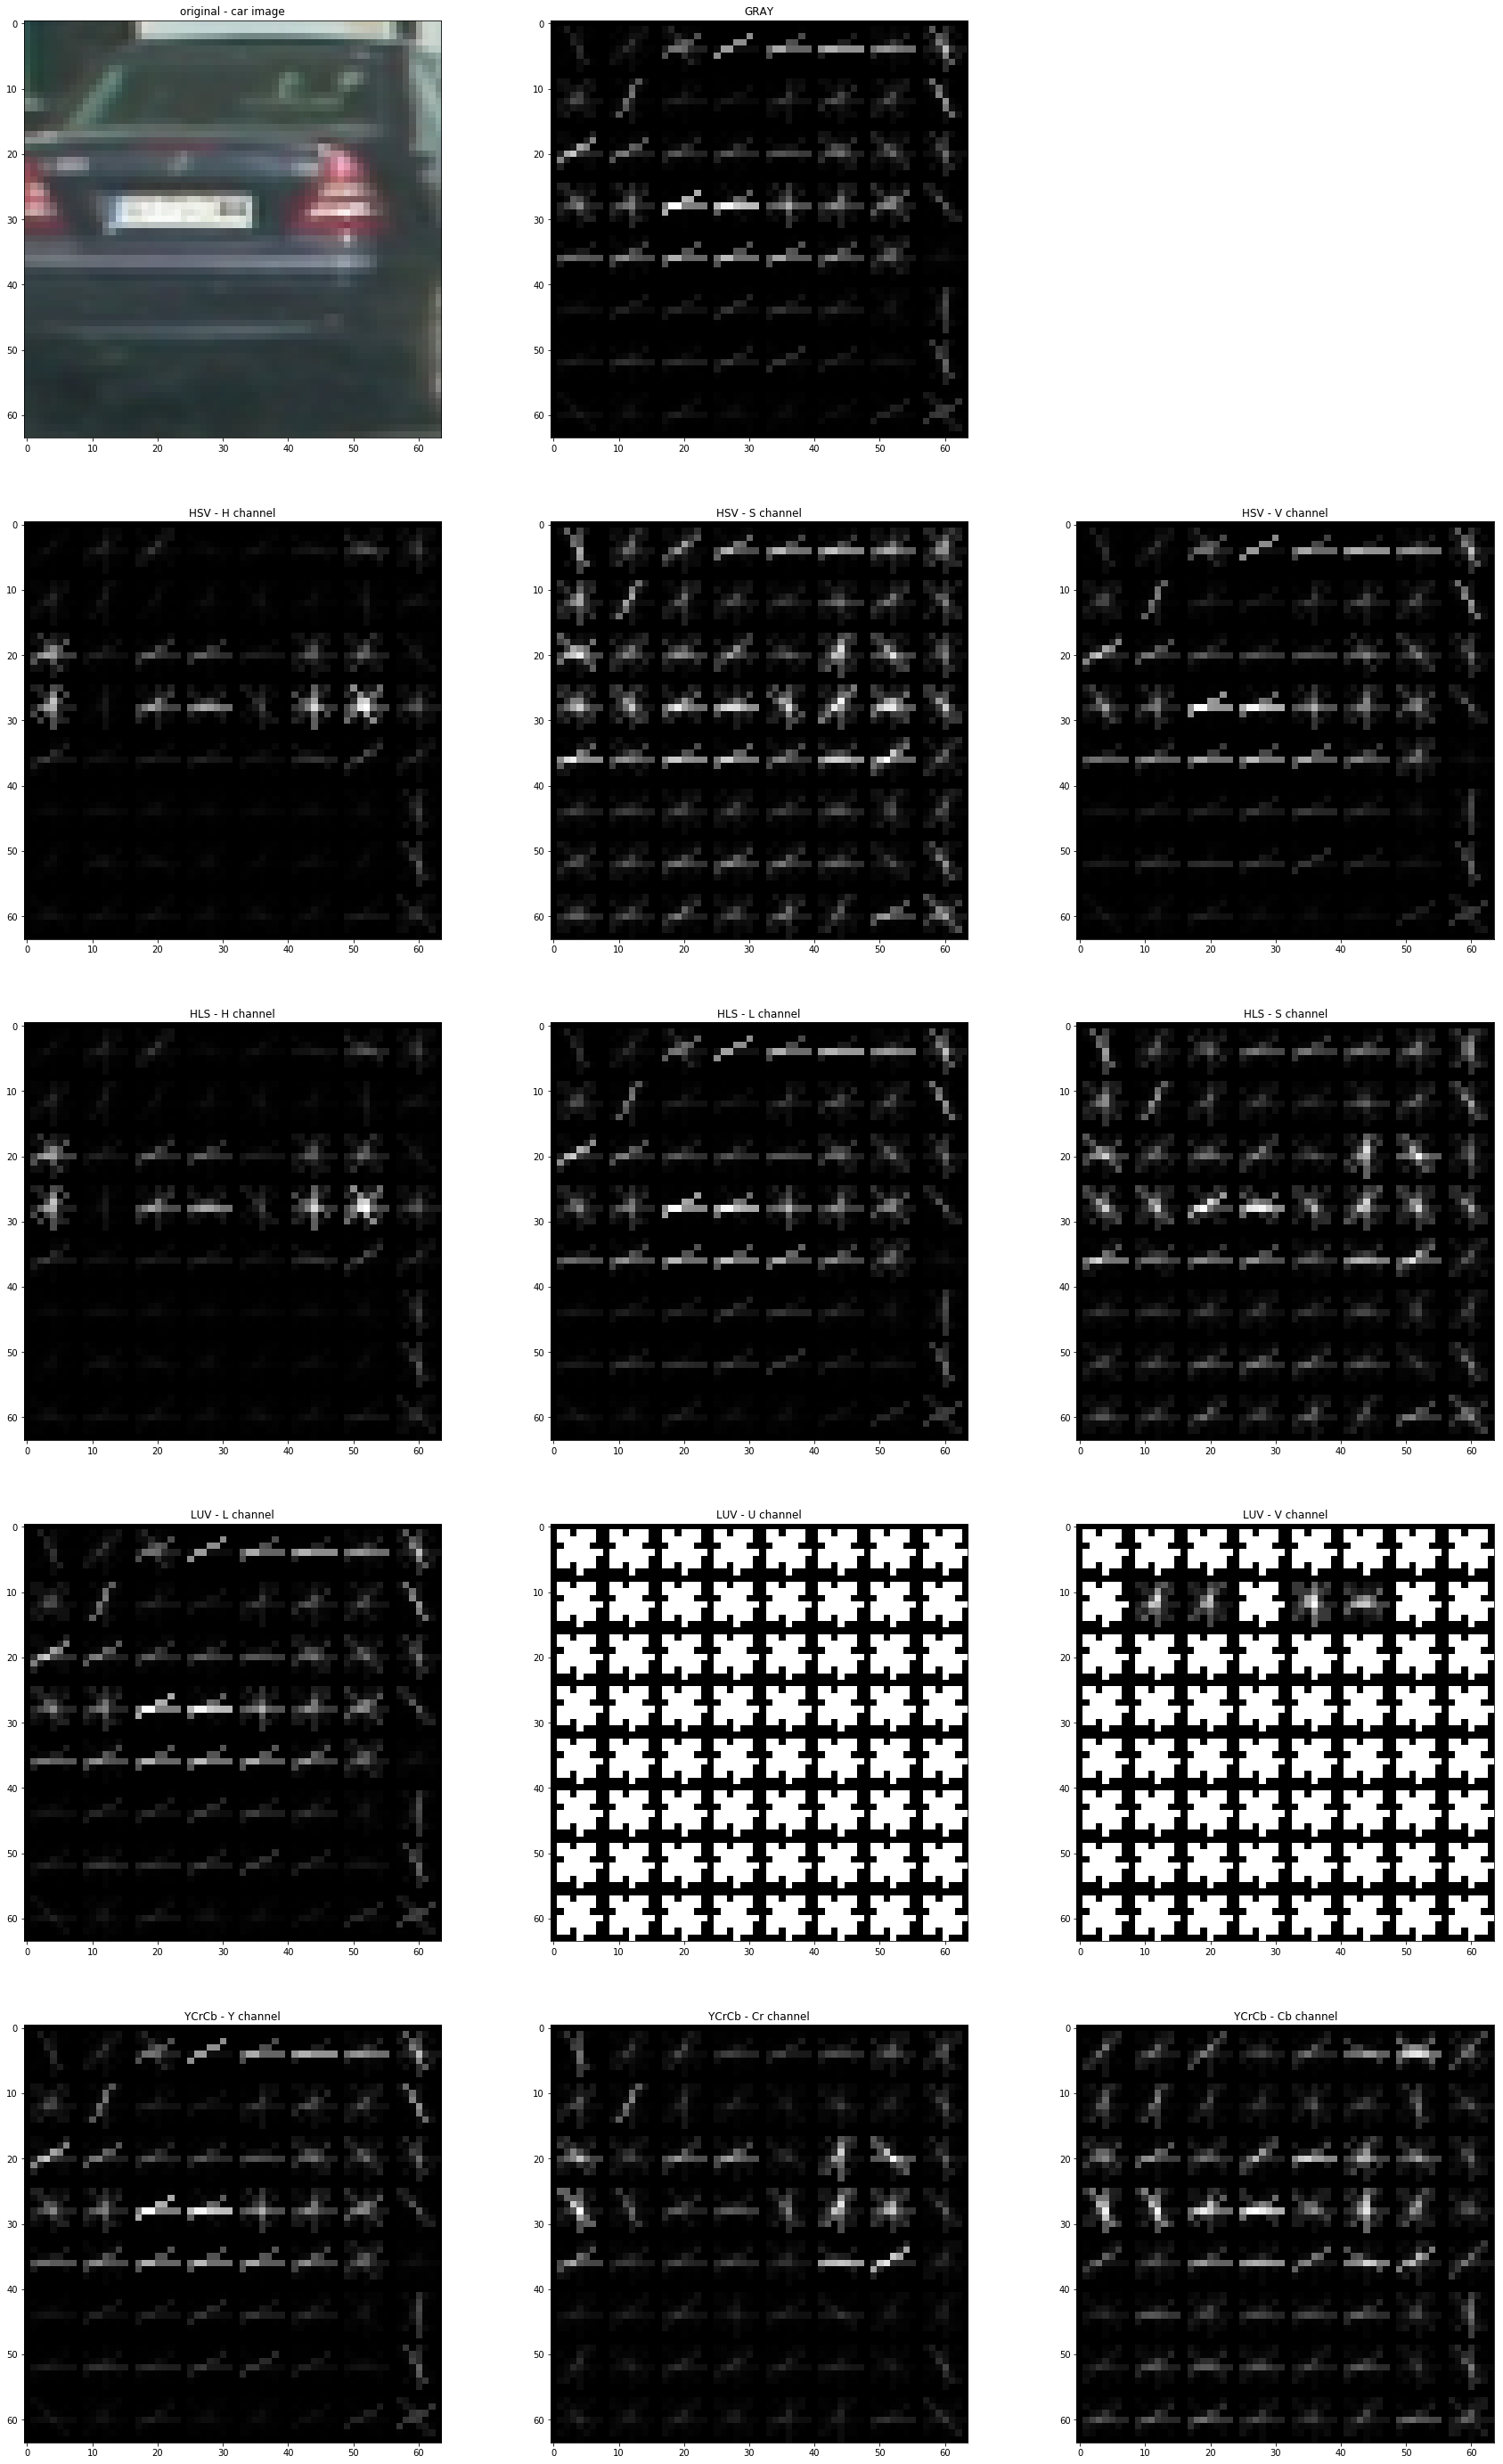

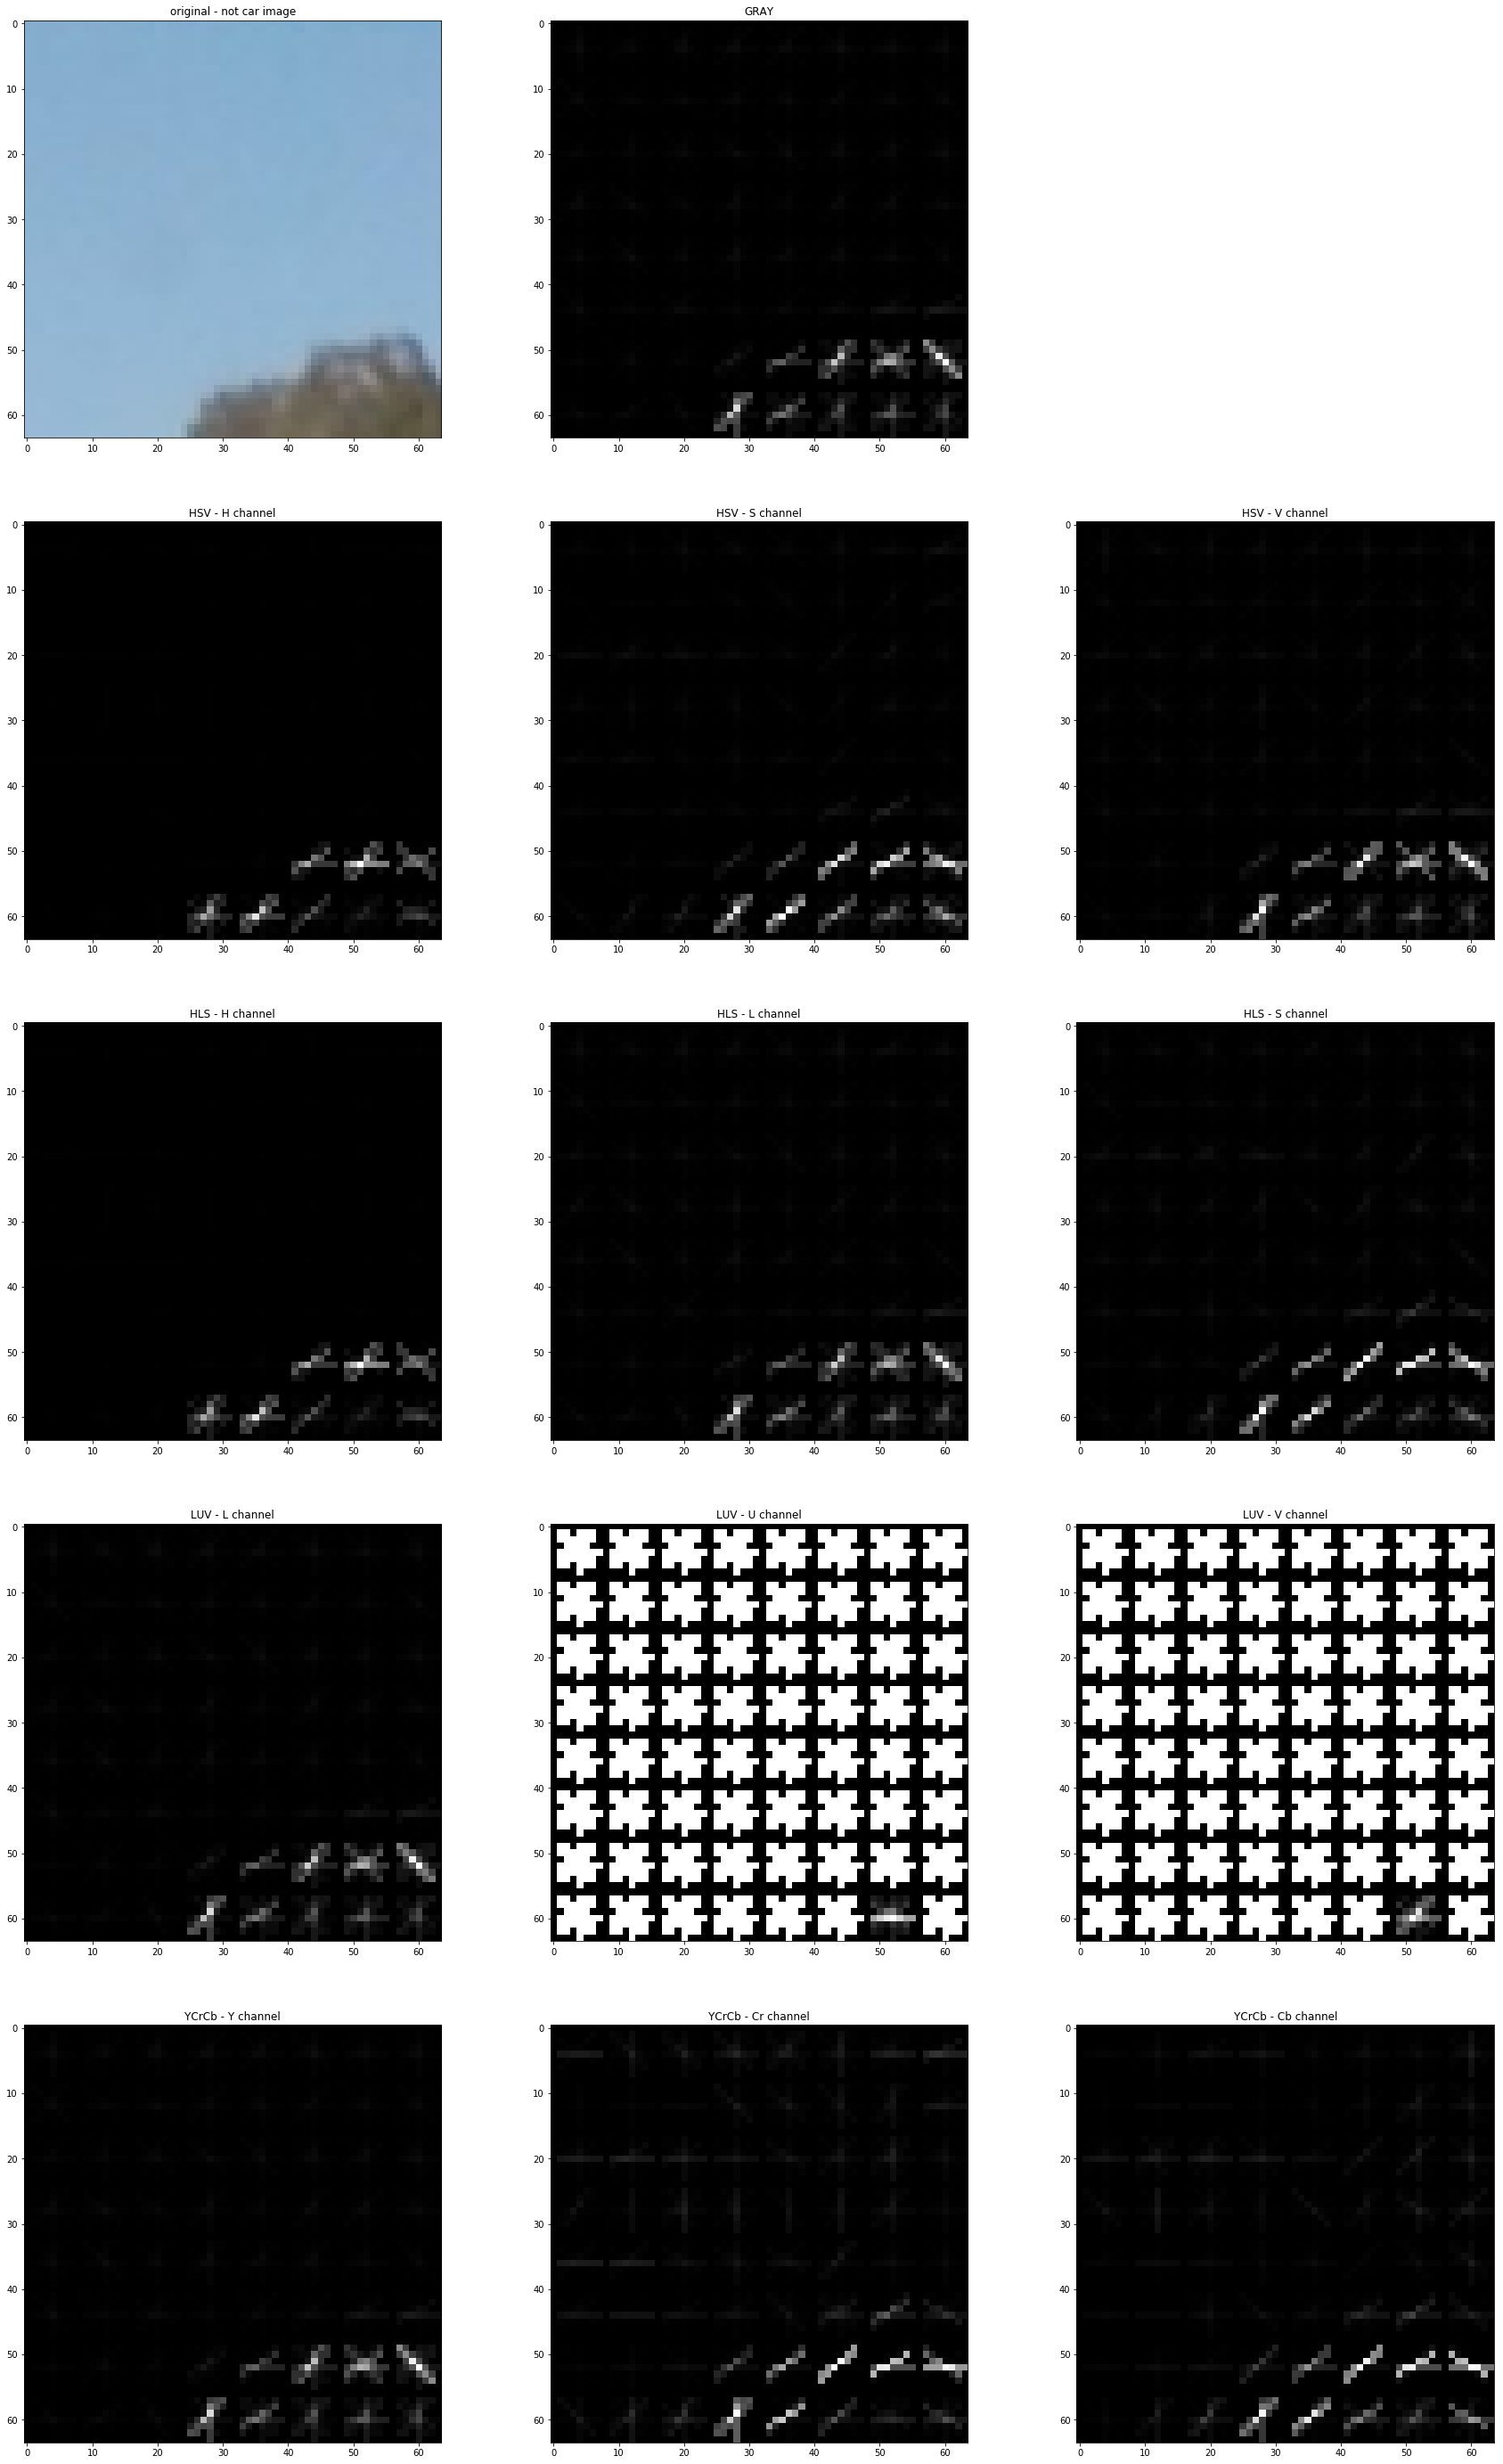

In [13]:
#example of hog transform
orient = 8
pix_per_cell = 8
cell_per_block = 2
car_img_example=mpimg.imread(car_imgs[1000])
car_img_example_gray=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2GRAY)
car_img_example_hsv=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2HSV)
car_img_example_hls=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2HLS)
car_img_example_luv=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2LUV)
car_img_example_ycrcb=cv2.cvtColor(car_img_example,cv2.COLOR_RGB2YCrCb)
noncar_img_example=mpimg.imread(noncar_imgs[1000])
noncar_img_example_gray=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2GRAY)
noncar_img_example_hsv=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2HSV)
noncar_img_example_hls=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2HLS)
noncar_img_example_luv=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2LUV)
noncar_img_example_ycrcb=cv2.cvtColor(noncar_img_example,cv2.COLOR_RGB2YCrCb)
_, car_hog_img_gray = get_hog_features(car_img_example_gray, orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hsv_h = get_hog_features(car_img_example_hsv[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hsv_s = get_hog_features(car_img_example_hsv[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hsv_v = get_hog_features(car_img_example_hsv[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hls_h = get_hog_features(car_img_example_hls[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hls_l = get_hog_features(car_img_example_hls[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_hls_s = get_hog_features(car_img_example_hls[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_luv_l = get_hog_features(car_img_example_luv[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_luv_u = get_hog_features(car_img_example_luv[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_luv_v = get_hog_features(car_img_example_luv[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_ycrcb_y = get_hog_features(car_img_example_ycrcb[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_ycrcb_cr = get_hog_features(car_img_example_ycrcb[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, car_hog_img_ycrcb_cb = get_hog_features(car_img_example_ycrcb[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
#
_, noncar_hog_img_gray = get_hog_features(noncar_img_example_gray, orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hsv_h = get_hog_features(noncar_img_example_hsv[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hsv_s = get_hog_features(noncar_img_example_hsv[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hsv_v = get_hog_features(noncar_img_example_hsv[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hls_h = get_hog_features(noncar_img_example_hls[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hls_l = get_hog_features(noncar_img_example_hls[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_hls_s = get_hog_features(noncar_img_example_hls[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_luv_l = get_hog_features(noncar_img_example_luv[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_luv_u = get_hog_features(noncar_img_example_luv[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_luv_v = get_hog_features(noncar_img_example_luv[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_ycrcb_y = get_hog_features(noncar_img_example_ycrcb[:,:,0], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_ycrcb_cr = get_hog_features(noncar_img_example_ycrcb[:,:,1], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
_, noncar_hog_img_ycrcb_cb = get_hog_features(noncar_img_example_ycrcb[:,:,2], orient, pix_per_cell, cell_per_block, 
                                                     vis=True, feature_vec=True)
plt.figure(figsize=(30,50))
i=1
plt.subplot(5,3,i)
i+=1
plt.imshow(car_img_example)
plt.title('original - car image')
plt.subplot(5,3,i)
i+=2
plt.imshow(car_hog_img_gray,cmap='Greys_r')
plt.title('GRAY')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hsv_h,cmap='Greys_r')
plt.title('HSV - H channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hsv_s,cmap='Greys_r')
plt.title('HSV - S channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hsv_v,cmap='Greys_r')
plt.title('HSV - V channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hls_h,cmap='Greys_r')
plt.title('HLS - H channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hls_l,cmap='Greys_r')
plt.title('HLS - L channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_hls_s,cmap='Greys_r')
plt.title('HLS - S channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_luv_l,cmap='Greys_r')
plt.title('LUV - L channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_luv_u,cmap='Greys_r')
plt.title('LUV - U channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_luv_v,cmap='Greys_r')
plt.title('LUV - V channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_ycrcb_y,cmap='Greys_r')
plt.title('YCrCb - Y channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_ycrcb_cr,cmap='Greys_r')
plt.title('YCrCb - Cr channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(car_hog_img_ycrcb_cb,cmap='Greys_r')
plt.title('YCrCb - Cb channel')
#
plt.figure(figsize=(30,50))
i=1
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_img_example)
plt.title('original - not car image')
plt.subplot(5,3,i)
i+=2
plt.imshow(noncar_hog_img_gray,cmap='Greys_r')
plt.title('GRAY')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hsv_h,cmap='Greys_r')
plt.title('HSV - H channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hsv_s,cmap='Greys_r')
plt.title('HSV - S channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hsv_v,cmap='Greys_r')
plt.title('HSV - V channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hls_h,cmap='Greys_r')
plt.title('HLS - H channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hls_l,cmap='Greys_r')
plt.title('HLS - L channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_hls_s,cmap='Greys_r')
plt.title('HLS - S channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_luv_l,cmap='Greys_r')
plt.title('LUV - L channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_luv_u,cmap='Greys_r')
plt.title('LUV - U channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_luv_v,cmap='Greys_r')
plt.title('LUV - V channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_ycrcb_y,cmap='Greys_r')
plt.title('YCrCb - Y channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_ycrcb_cr,cmap='Greys_r')
plt.title('YCrCb - Cr channel')
plt.subplot(5,3,i)
i+=1
plt.imshow(noncar_hog_img_ycrcb_cb,cmap='Greys_r')
plt.title('YCrCb - Cb channel')

In [40]:
#hog transform to a set of images
def extract_features(imgs, cspace='RGB', orient=8, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)
        elif hog_channel == 'GRAY':
            gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            hog_features = get_hog_features(gray_image, orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            
        # Append the new feature vector to the features list
        features.append(hog_features)

    # Return list of feature vectors
    return features

In [10]:
# process data
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(car_imgs, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(noncar_imgs, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

n_cf = len(car_features)
n_ncf = len(notcar_features)

#clean-up memory
car_features = []
notcar_features = []

# Define the labels vector
y = np.hstack((np.ones(n_cf), np.zeros(n_ncf)))

# Split up data into randomized training and test sets
np.random.seed(0)
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)

#memory clean-up
X=0
y=0
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

pickle_file_name = "train_test_data_{}.p".format(colorspace)
hh=open( pickle_file_name, "wb" )
pickle.dump( X_scaler, hh )
pickle.dump( X_train, hh )
pickle.dump( X_test, hh)
pickle.dump( y_train, hh )
pickle.dump( y_test, hh)
hh.close()

240.84 Seconds to extract HOG features...
Using: 8 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 4704


In [21]:
#train and test
#pickle_file_name = '../train_test_data_YCrCb.p'
#pickle.load( open( pickle_file_name, "rb" ))
kernel='rbf' #'linear','rbf'
C=1 #.0001,.001,.01,.1
# Use a non linear SVC with kernel 'rbf'
clf = SVC(kernel=kernel,C=C)
# Check the training time for the SVC
t=time.time()
clf.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Train Accuracy of SVC = ', round(clf.score(X_train, y_train), 4))
print('Test Accuracy of SVC = ', round(clf.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', clf.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')
print('About', round((t2-t)/n_predict, 5), 'Seconds per label')
pickle.dump( clf, open( '../classifier.p', "wb" ) )

316.54 Seconds to train SVC 3 times...
Train Accuracy of SVC =  0.9901
Test Accuracy of SVC =  0.9837
My SVC predicts:  [ 1.  1.  0.  1.  0.  1.  1.  1.  0.  0.]
For these 10 labels:  [ 1.  1.  0.  1.  0.  1.  1.  1.  0.  0.]
0.229 Seconds to predict 10 labels with SVC
About 0.0229 Seconds per label


In [78]:
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient=8, pix_per_cell=8, cell_per_block=2):
    
    #draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    bbox_list = []
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

         
            # Scale features and make a prediction
            test_features = X_scaler.transform(hog_features.reshape(1, -1))
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                #cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6)
                bbox_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return bbox_list

In [79]:
# 
X_scaler=pickle.load( open('../train_test_data_YCrCb.p', "rb" ))
clf=pickle.load( open( '../classifier.p', "rb" ) )
test_imgs = glob.glob('./test_images/test*.jpg')

In [94]:
# find cars test
ystart = [400, 400, 400]
ystop = [528, 576, 656]
scale = [1.5, 2, 3]

img = mpimg.imread('./test_images/test6.jpg')
rectangles_list = []

for i in range(len(ystart)):
    bbox_list = find_cars(img, ystart[i], ystop[i], scale[i], clf, X_scaler)
    #cv2.rectangle(img,bbox_list[0],bbox_list[1],(0,0,255),6)       
    rectangles_list.append(bbox_list)
    
   # plt.figure()
   # plt.imshow(img)

In [95]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

1 cars found


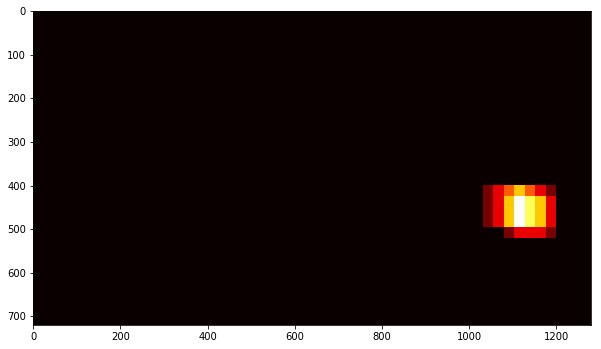

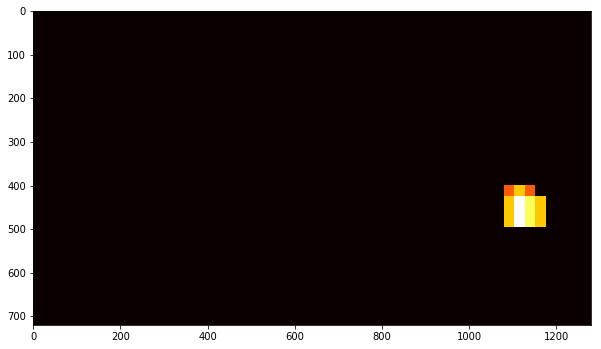

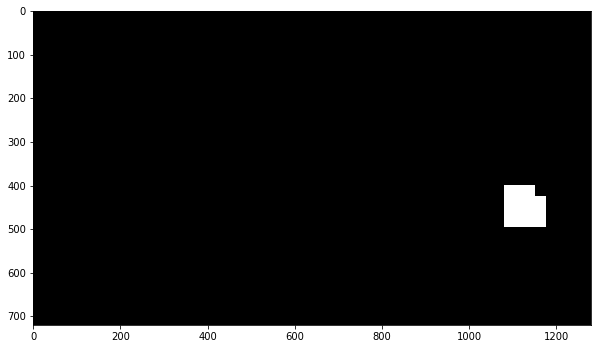

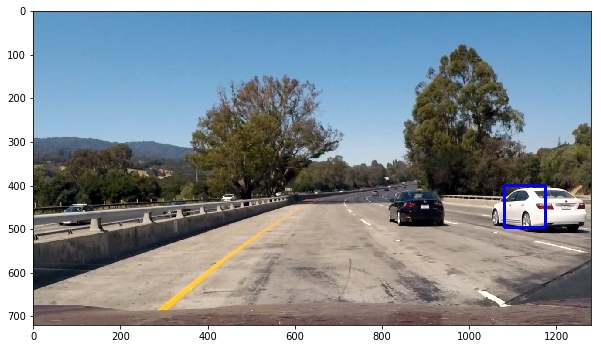

In [96]:
# heatmap test

heatmap_img = np.zeros_like(img[:,:,0])
heatmap_img = add_heat(heatmap_img, rectangles_list[0])
plt.figure(figsize=(10,10))
plt.imshow(heatmap_img, cmap='hot')

heatmap_img = apply_threshold(heatmap_img, 2)
plt.figure(figsize=(10,10))
plt.imshow(heatmap_img, cmap='hot')

labels = label(heatmap_img)
print(labels[1], 'cars found')
plt.figure(figsize=(10,10))
plt.imshow(labels[0], cmap='gray')

# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(test_img), labels)
# Display the image
plt.figure(figsize=(10,10))
plt.imshow(draw_img)


In [ ]:
def process(img):
    
    ystart = 400
    ystop = 656
    scale = 1.5
    
    rectangle_list = []
    for i in range(len(ystart)):
        _,bbox_list = find_cars(img, ystart[i], ystop[i], scale[i], clf, X_scaler, orient=8, pix_per_cell=8, cell_per_block=2)
        rectangle_list.append(bbox_list)
        
    heatmap_img = np.zeros_like(img[:,:,0])
    heatmap_img = add_heat(heatmap_img, rectangle_list)
    heatmap_img = apply_threshold(heatmap_img, 2)
    labels = label(heatmap_img)
    out_img = draw_labeled_bboxes(np.copy(img), labels)
    

In [ ]:
from moviepy.editor import VideoFileClip

test_out_file = 'test_video_out.mp4'
clip_test = VideoFileClip('test_video.mp4')
clip_test_out = clip_test.fl_image(process)
%time clip_test_out.write_videofile(clip_test, audio=False)

In [ ]:
from moviepy.editor import VideoFileClip

proj_out_file = 'project_video_out.mp4'
clip_proj = VideoFileClip('project_video.mp4')
clip_proj_out = clip_test.fl_image(process)
%time clip_proj_out.write_videofile(clip_proj, audio=False)